In [1]:
import tensorflow as tf

2022-12-30 09:27:24.915193: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-30 09:27:25.725095: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-30 09:27:25.725153: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-30 09:27:25.725159: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load the Wine dataset
X, y = datasets.load_wine(return_X_y=True)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
# Define the model
model = tf.keras.Sequential()

# Add layers to the model
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(13,)))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

2022-12-30 09:27:26.809636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 09:27:26.837486: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 09:27:26.837685: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 09:27:26.838419: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [4]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50


2022-12-30 09:27:28.553452: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1cd27000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-30 09:27:28.553471: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 with Max-Q Design, Compute Capability 7.5
2022-12-30 09:27:28.567052: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-30 09:27:28.596214: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 1s 42ms/step - loss: 1.1816 - accuracy: 0.1831 - val_loss: 1.2080 - val_accuracy: 0.2222
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 1.1708 - accuracy: 0.2535 - val_loss: 1.1906 - val_accuracy: 0.2778
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 1.1585 - accuracy: 0.3028 - val_loss: 1.1799 - val_accuracy: 0.3056
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 1.1488 - accuracy: 0.3310 - val_loss: 1.1640 - val_accuracy: 0.3611
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 1.1370 - accuracy: 0.3310 - val_loss: 1.1520 - val_accuracy: 0.3889
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 1.1268 - accuracy: 0.3451 - val_loss: 1.1377 - val_accuracy: 0.3889
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 1.1164 - accuracy: 0.3380 - val_loss: 1.1242 - val_accuracy: 0.3889
Epoch 8/50
5/5 [============================

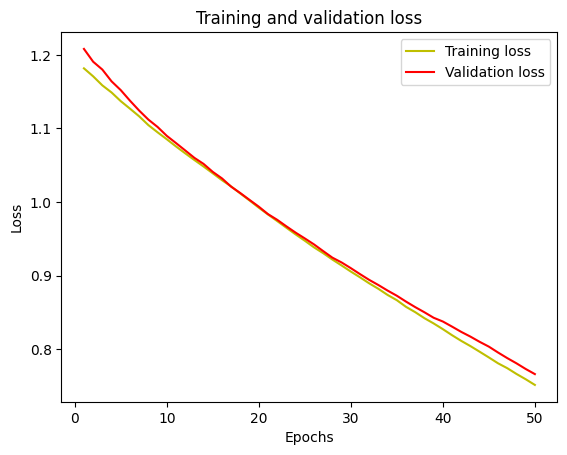

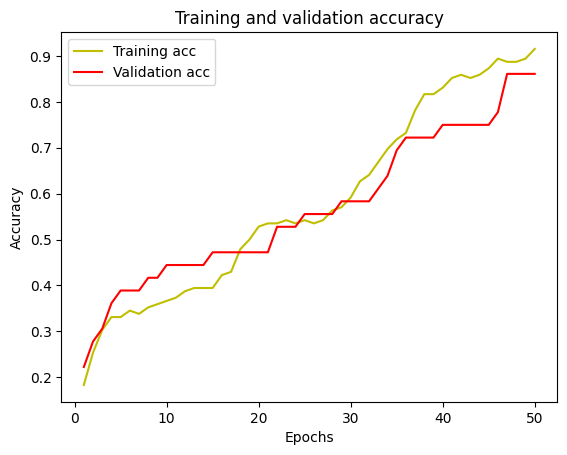

In [5]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()